0. Import libraries

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

1. Import dataset 

In [113]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(path)

In [114]:

df.head(10)

Unnamed: 0          id             date      price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000   221900.0       3.0       1.00   
1           1  6414100192  20141209T000000   538000.0       3.0       2.25   
2           2  5631500400  20150225T000000   180000.0       2.0       1.00   
3           3  2487200875  20141209T000000   604000.0       4.0       3.00   
4           4  1954400510  20150218T000000   510000.0       3.0       2.00   
5           5  7237550310  20140512T000000  1225000.0       4.0       4.50   
6           6  1321400060  20140627T000000   257500.0       3.0       2.25   
7           7  2008000270  20150115T000000   291850.0       3.0       1.50   
8           8  2414600126  20150415T000000   229500.0       3.0       1.00   
9           9  3793500160  20150312T000000   323000.0       3.0       2.50   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         1180      5650     1.0           0  ...      7        1180   
1         2570      7242     2.0           0  ...      7        2170   
2          770     10000     1.0           0  ...      6         770   
3         1960      5000     1.0           0  ...      7        1050   
4         1680      8080     1.0           0  ...      8        1680   
5         5420    101930     1.0           0  ...     11        3890   
6         1715      6819     2.0           0  ...      7        1715   
7         1060      9711     1.0           0  ...      7        1060   
8         1780      7470     1.0           0  ...      7        1050   
9         1890      6560     2.0           0  ...      7        1890   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   
5           1530      2001             0    98053  47.6561 -122.005   
6              0      1995             0    98003  47.3097 -122.327   
7              0      1963             0    98198  47.4095 -122.315   
8            730      1960             0    98146  47.5123 -122.337   
9              0      2003             0    98038  47.3684 -122.031   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  
5           4760      101930  
6           2238        6819  
7           1650        9711  
8           1780        8113  
9           2390        7570  

[10 rows x 22 columns]

# About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). It was also slightly modified for the purposes of this course. 

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In [115]:
df.describe()

Unnamed: 0            id         price      bedrooms     bathrooms  \
count  21613.00000  2.161300e+04  2.161300e+04  21600.000000  21603.000000   
mean   10806.00000  4.580302e+09  5.400881e+05      3.372870      2.115736   
std     6239.28002  2.876566e+09  3.671272e+05      0.926657      0.768996   
min        0.00000  1.000102e+06  7.500000e+04      1.000000      0.500000   
25%     5403.00000  2.123049e+09  3.219500e+05      3.000000      1.750000   
50%    10806.00000  3.904930e+09  4.500000e+05      3.000000      2.250000   
75%    16209.00000  7.308900e+09  6.450000e+05      4.000000      2.500000   
max    21612.00000  9.900000e+09  7.700000e+06     33.000000      8.000000   

        sqft_living      sqft_lot        floors    waterfront          view  \
count  21613.000000  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean    2079.899736  1.510697e+04      1.494309      0.007542      0.234303   
std      918.440897  4.142051e+04      0.539989      0.086517      0.766318   
min      290.000000  5.200000e+02      1.000000      0.000000      0.000000   
25%     1427.000000  5.040000e+03      1.000000      0.000000      0.000000   
50%     1910.000000  7.618000e+03      1.500000      0.000000      0.000000   
75%     2550.000000  1.068800e+04      2.000000      0.000000      0.000000   
max    13540.000000  1.651359e+06      3.500000      1.000000      4.000000   

       ...         grade    sqft_above  sqft_basement      yr_built  \
count  ...  21613.000000  21613.000000   21613.000000  21613.000000   
mean   ...      7.656873   1788.390691     291.509045   1971.005136   
std    ...      1.175459    828.090978     442.575043     29.373411   
min    ...      1.000000    290.000000       0.000000   1900.000000   
25%    ...      7.000000   1190.000000       0.000000   1951.000000   
50%    ...      7.000000   1560.000000       0.000000   1975.000000   
75%    ...      8.000000   2210.000000     560.000000   1997.000000   
max    ...     13.000000   9410.000000    4820.000000   2015.000000   

       yr_renovated       zipcode           lat          long  sqft_living15  \
count  21613.000000  21613.000000  21613.000000  21613.000000   21613.000000   
mean      84.402258  98077.939805     47.560053   -122.213896    1986.552492   
std      401.679240     53.505026      0.138564      0.140828     685.391304   
min        0.000000  98001.000000     47.155900   -122.519000     399.000000   
25%        0.000000  98033.000000     47.471000   -122.328000    1490.000000   
50%        0.000000  98065.000000     47.571800   -122.230000    1840.000000   
75%        0.000000  98118.000000     47.678000   -122.125000    2360.000000   
max     2015.000000  98199.000000     47.777600   -121.315000    6210.000000   

          sqft_lot15  
count   21613.000000  
mean    12768.455652  
std     27304.179631  
min       651.000000  
25%      5100.000000  
50%      7620.000000  
75%     10083.000000  
max    871200.000000  

[8 rows x 21 columns]

In [116]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

2. Data wrangling

In [117]:
df.drop(['Unnamed: 0', 'id'], axis=1, inplace = True)
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21613.000000   21613.000000  21613.000000  21613.000000  21613.000000   
mean    1788.390691     291.509045   1971.005136     84.402258  98077.939805   
std      828.090978     442.575043     29.373411    401.679240     53.505026   
min      290.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000   21613.000000   21613.000000  
mean      47.560053   -122.213896    1986.552492   12768.455652  
std        0.138564      0.140828     685.391304   27304.179631  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471000   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.230000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [7]:
print("Number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("Number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

Number of NaN values for the column bedrooms : 13
Number of NaN values for the column bathrooms : 10


In [118]:
#Replace with mean value
mean_value = df["bedrooms"].mean()
df["bedrooms"].replace(np.nan, mean_value, inplace=True)

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_11808\2791178831.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bedrooms"].replace(np.nan, mean_value, inplace=True)


In [119]:
mean_value = df["bathrooms"].mean()
df["bathrooms"].replace(np.nan, mean_value, inplace=True)

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_11808\1597981368.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bathrooms"].replace(np.nan, mean_value, inplace=True)


In [17]:
#Recheck
print("Number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("Number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

Number of NaN values for the column bedrooms : 0
Number of NaN values for the column bathrooms : 0


3. Exploratory Data Analysis

In [18]:
df["floors"].value_counts()

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

<Axes: xlabel='waterfront', ylabel='price'>

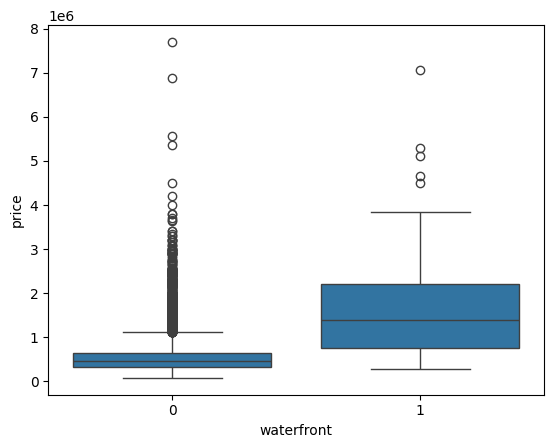

In [19]:
#Boxplot
sns.boxplot(x="waterfront", y="price", data=df)

(0.0, 8081250.0)

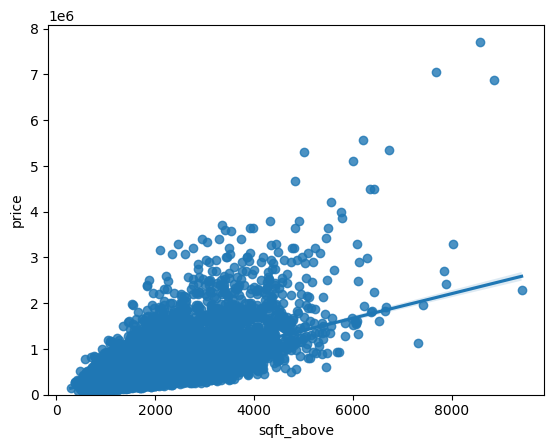

In [ ]:
#Correlation and regression line
sns.regplot(x="sqft_above", y = "price", data = df)
plt.ylim(0,)

In [ ]:
df.select_dtypes(include=['number']).corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

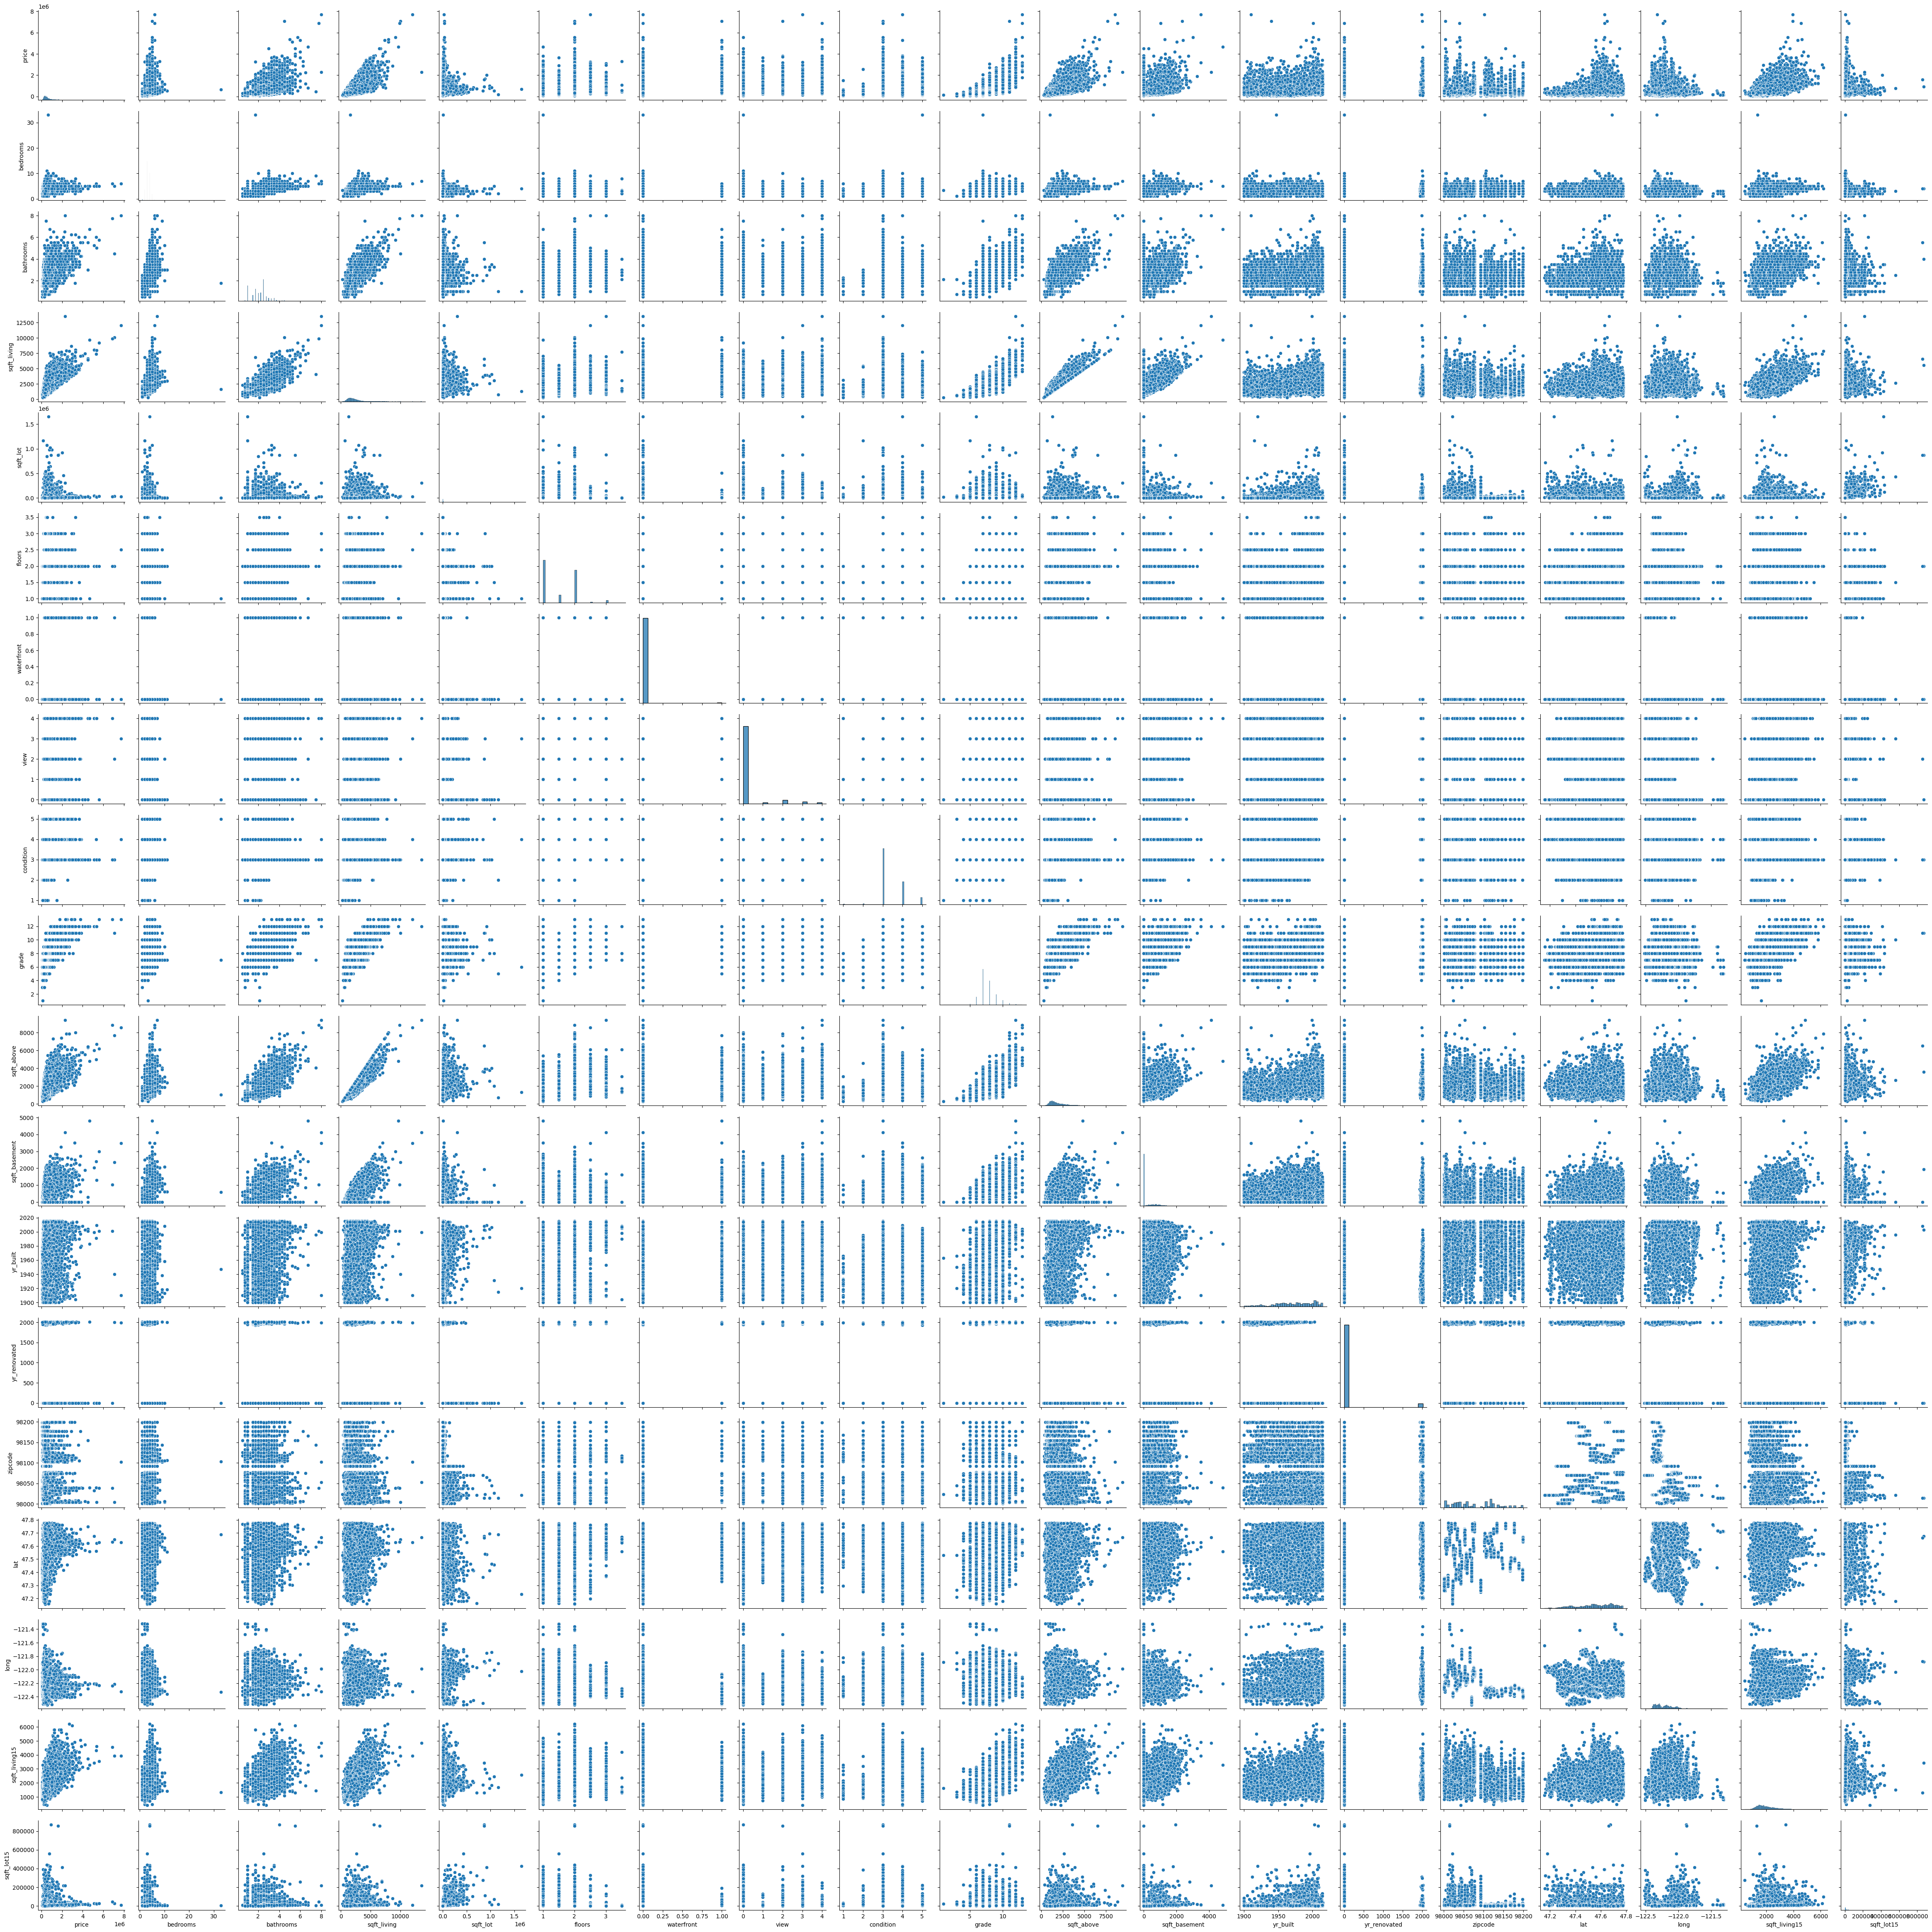

In [ ]:
# paiwise scatter plot for all variables in df_numeric_only
df_numeric_only = df.select_dtypes(include=['number'])

sns.pairplot(df_numeric_only)

4. Model Development

a. Simple linear regression

In [120]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [121]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.4928532179037931

b. Multiple linear regression

In [122]:

X = df[["bedrooms", "bathrooms", "sqft_lot", "sqft_above", "sqft_basement","yr_built" , "sqft_living","grade", "sqft_living15", "sqft_lot15"]]
Y = df["price"]
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.6178508156906399

c. Polynomial regression

In [123]:
Input = [('scale', StandardScaler()), ('polinomial', PolynomialFeatures()), ('model', LinearRegression())]
pipe = Pipeline(Input)

In [124]:
pipe.fit(X, Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polinomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [125]:
#R-squared of polinomial model
r_squared = pipe.score(X, Y)
print('The R-square value is: ', r_squared)

The R-square value is:  0.7060002315546294


5. Model Evaluation and Refinement

In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

In [127]:
features =["bedrooms", "bathrooms", "sqft_lot", "sqft_above", "sqft_basement","yr_built" , "sqft_living","grade", "sqft_living15", "sqft_lot15"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


print("Number of test samples:", x_test.shape[0])
print("Number of training samples:",x_train.shape[0])

Number of test samples: 4323
Number of training samples: 17290


a. Model evaluation(without Cross-validation)

In [133]:
lm = LinearRegression()

In [134]:
lm.fit(x_train, y_train)

LinearRegression()

In [137]:
Yhat = lm.predict(x_train)
Yhat[0:10]

array([555365.73566334, 719409.07376337, 472793.25716248, 810558.57469819,
       339783.76390308, 178639.42109448, 297946.73715743, 540518.96683274,
       896286.95308782, 595489.27595086])

In [138]:
Yhat1 = lm.predict(x_test)
Yhat1[0:10]

array([745963.38748862, 339076.27195756, 890790.24004267, 687119.03359878,
       318778.71883354, 632862.84485709, 597328.83161873, 851880.26774042,
       547102.39502995, 598757.32607574])

Text(0, 0.5, 'Features')

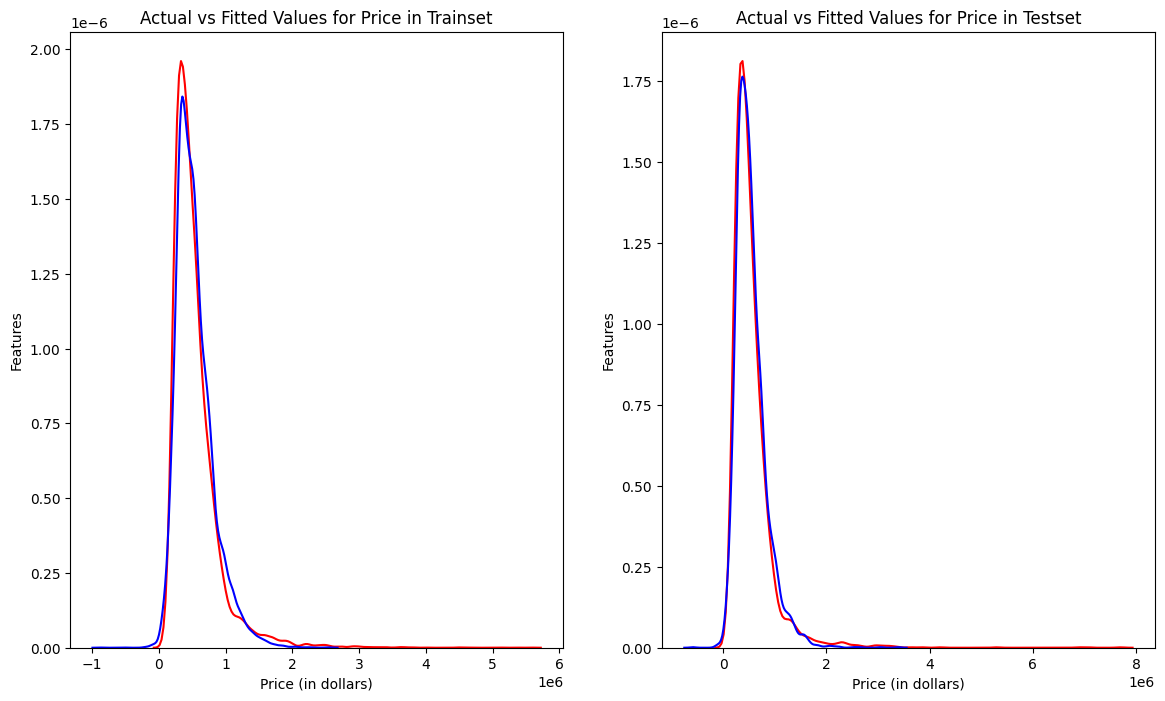

In [139]:
plt.figure(figsize=(14, 8))

#trainset
plt.subplot(121)
ax1 = sns.kdeplot(y_train, color= 'r', label = 'Actual Value')
sns.kdeplot(Yhat, color ='b', label = 'Fitted Value', ax=ax1)
plt.title('Actual vs Fitted Values for Price in Trainset')
plt.xlabel('Price (in dollars)')
plt.ylabel('Features')

#testset
plt.subplot(122)
ax1 = sns.kdeplot(y_test, color= 'r', label = 'Actual Value')
sns.kdeplot(Yhat1, color ='b', label = 'Fitted Value', ax=ax1)
plt.title('Actual vs Fitted Values for Price in Testset')
plt.xlabel('Price (in dollars)')
plt.ylabel('Features')

In [141]:
r_squared_train = lm.score(x_train, y_train)
r_squared_test = lm.score(x_test, y_test)
print('The R-square value of trainset is: ', r_squared_train, 'The R-square value of testset is: ', r_squared_test)

The R-square value of trainset is:  0.6174097065607485 The R-square value of testset is:  0.6170193431471553


b. Model Evaluation(apply Cross-validation)

In [197]:
lm = LinearRegression()

In [198]:
scores = cross_val_score(lm, X, Y, cv = 5)
print(scores)

[0.60412649 0.61889207 0.61720773 0.62735114 0.59518213]


In [199]:
print("The mean of the folds are", scores.mean(), "and the standard deviation is" , scores.std())

The mean of the folds are 0.6125519098518811 and the standard deviation is 0.011433181571995334


In [200]:
yhat = cross_val_predict(lm, X, Y, cv = 5)
print("The mean of the folds are", yhat.mean(), "and the standard deviation is" , yhat.std())

The mean of the folds are 538284.2573855947 and the standard deviation is 289037.92016557686


6. Rigde regression

Set the regularization parameter to 0.1


In [144]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
Yhat = RidgeModel.predict(x_train)

In [146]:
RR_R_squared = RidgeModel.score(x_test, y_test)
print("The R-squared of the Ridge model are", RR_R_squared)

The R-squared of the Ridge model are 0.6170191818621807


7. Ridge regression with order = 2 and select the regularization parameter that minimize the test error

In [154]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[["bedrooms", "bathrooms", "sqft_lot", "sqft_above", "sqft_basement","yr_built" , "sqft_living","grade", "sqft_living15", "sqft_lot15"]])
x_test_pr=pr.fit_transform(x_test[["bedrooms", "bathrooms", "sqft_lot", "sqft_above", "sqft_basement","yr_built" , "sqft_living","grade", "sqft_living15", "sqft_lot15"]])

In [179]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = np.array([0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ])
pbar = tqdm(Alpha)

for alpha in pbar:
    RidgeModel = Ridge(alpha=alpha) 
    RidgeModel.fit(x_train_pr, y_train)
    test_score, train_score = RidgeModel.score(x_test_pr, y_test), RidgeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 28/28 [00:02<00:00, 12.09it/s, Test Score=0.733, Train Score=0.692]


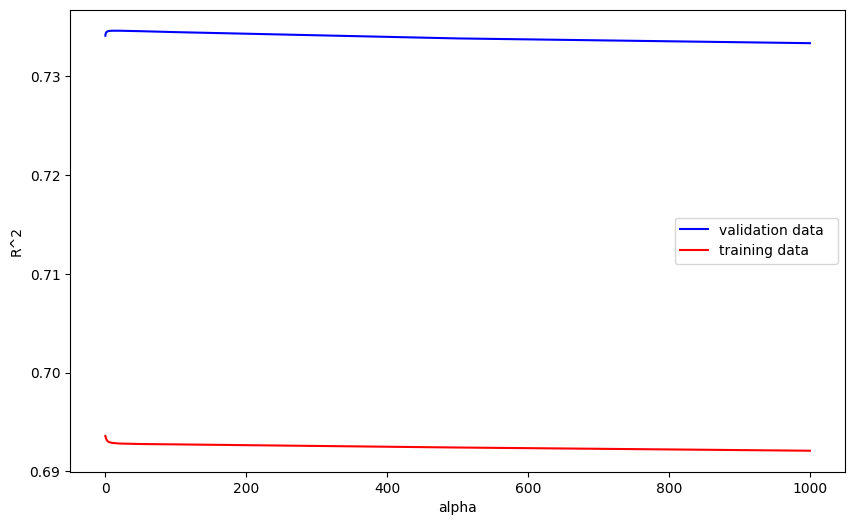

In [180]:
plt.figure(figsize=(10, 6))

plt.plot(Alpha,Rsqu_test, 'b', label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [193]:
RidgeModel=Ridge(alpha=0.1)

In [194]:
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

In [196]:
RR_R_squared = RidgeModel.score(x_test_pr, y_test)
print("The R-squared of the Ridge model are", RR_R_squared)

The R-squared of the Ridge model are 0.7341797990708638
